# Stock Price Predictions using RNN

In [1]:
# Load Dataset
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

'''Input data files are available in the read-only "../input/" directory
For example, running this (by clicking run or pressing Shift+Enter) 
will list all files under the input directory'''

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

''' You can write up to 5GB to the current directory (/kaggle/working/) 
that gets preserved as output when you create a version using "Save & Run All" 
You can also write temporary files to /kaggle/temp/, 
but they won't be saved outside of the current session'''

In [2]:
data = pd.read_csv('C:/Users/HP/Desktop/TSLA.csv')


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [5]:
#Spliting Data as Train and Validation

length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 2956
Train data length : 2069
Validation data lenth : 887


In [6]:
train_data = data[:length_train].iloc[:,:2] # Indexer used for Integer-location-based indexing of data in a DataFrame
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2010-06-29,3.800000
1,2010-06-30,5.158000
2,2010-07-01,5.000000
3,2010-07-02,4.600000
4,2010-07-06,4.000000
...,...,...
2064,2018-09-10,54.652000
2065,2018-09-11,55.894001
2066,2018-09-12,56.287998
2067,2018-09-13,57.604000


In [7]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
2069,2018-09-17,58.007999
2070,2018-09-18,59.338001
2071,2018-09-19,56.102001
2072,2018-09-20,60.712002
2073,2018-09-21,59.540001
...,...,...
2951,2022-03-18,874.489990
2952,2022-03-21,914.979980
2953,2022-03-22,930.000000
2954,2022-03-23,979.940002


In [8]:
'''
3.Creating Train Dataset from Train split
We will get Open column as our dataset
Dataset to be converted to array by adding .values
'''

dataset_train = train_data.Open.values
dataset_train.shape

(2069,)

In [9]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(2069, 1)

In [10]:
#Normalization / Feature Scaling

#Dataset values will be in between 0 and 1 after scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(2069, 1)

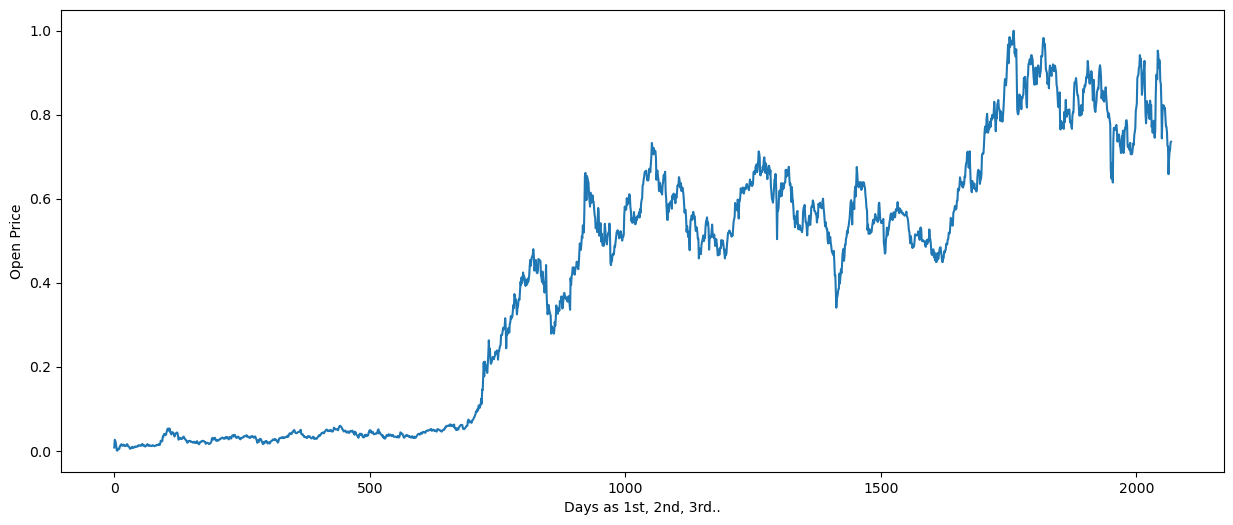

In [11]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [12]:
#5.Creating X_train and y_train from Train data

X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (2019, 50)
Shape of y_train before reshape : (2019,)


In [14]:
# Reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (2019, 50, 1)
Shape of y_train after reshape : (2019, 1)


In [15]:
'''
Shape of X_train : 1134 x 50 x 1
That means we have 1134 rows, each row has 50 rows and 1 column
Lets check the first row: it has 50 rows (open prices of 49 days)
'''

X_train[0]

array([[0.00771826],
       [0.02604237],
       [0.0239104 ],
       [0.01851302],
       [0.01041695],
       [0.00070166],
       [0.        ],
       [0.00388612],
       [0.00488463],
       [0.00337336],
       [0.00485764],
       [0.01025503],
       [0.01230603],
       [0.01411416],
       [0.01540953],
       [0.01219808],
       [0.01176629],
       [0.01362839],
       [0.01446499],
       [0.01287276],
       [0.01190123],
       [0.01249494],
       [0.01095669],
       [0.01176629],
       [0.01311564],
       [0.0156794 ],
       [0.01457293],
       [0.01068682],
       [0.01014708],
       [0.00947241],
       [0.00688166],
       [0.00447983],
       [0.00550533],
       [0.00623398],
       [0.00761031],
       [0.00931048],
       [0.00647686],
       [0.00677372],
       [0.00796114],
       [0.00839293],
       [0.00815005],
       [0.01012009],
       [0.00974228],
       [0.00960734],
       [0.00949939],
       [0.00939145],
       [0.01141546],
       [0.012

In [16]:
'''
Check the first item in y_train
It is the price of 50th day
'''

y_train[0]

array([0.01311564])

In [17]:
#6.Creating RNN model

# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(  Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile( optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)




Epoch 1/50


64/64 [==============================] - 6s 24ms/step - loss: 0.3492 - accuracy: 4.9529e-04
Epoch 2/50
64/64 [==============================] - 1s 22ms/step - loss: 0.1669 - accuracy: 0.0000e+00
Epoch 3/50
64/64 [==============================] - 1s 23ms/step - loss: 0.1069 - accuracy: 4.9529e-04
Epoch 4/50
64/64 [==============================] - 2s 24ms/step - loss: 0.0695 - accuracy: 0.0000e+00
Epoch 5/50
64/64 [==============================] - 2s 24ms/step - loss: 0.0553 - accuracy: 4.9529e-04
Epoch 6/50
64/64 [==============================] - 2s 35ms/step - loss: 0.0399 - accuracy: 4.9529e-04
Epoch 7/50
64/64 [==============================] - 2s 35ms/step - loss: 0.0341 - accuracy: 4.9529e-04
Epoch 8/50
64/64 [==============================] - 2s 31ms/step - loss: 0.0288 - accuracy: 4.9529e-04
Epoch 9/50
64/64 [==============================] - 2s 33ms/step - loss: 0.0252 - accuracy: 4.9529e-04
Epoch 10/50
64/64 [==============================] - 2s 36ms/step - 

In [18]:
#Evaluating Model

# Losses
history.history["loss"]

[0.3491789996623993,
 0.16689841449260712,
 0.10694437474012375,
 0.06947997212409973,
 0.05534106120467186,
 0.03988265618681908,
 0.034131716936826706,
 0.028845559805631638,
 0.02516065165400505,
 0.021413110196590424,
 0.01898878626525402,
 0.016668744385242462,
 0.016260962933301926,
 0.013463110662996769,
 0.012994179502129555,
 0.01019999012351036,
 0.009932797402143478,
 0.008845791220664978,
 0.008111966773867607,
 0.00865632202476263,
 0.006847275421023369,
 0.007004075217992067,
 0.006428664084523916,
 0.006288057193160057,
 0.006027613766491413,
 0.00551490718498826,
 0.005468746181577444,
 0.004859300330281258,
 0.004762692376971245,
 0.004600343760102987,
 0.004285498522222042,
 0.004339974839240313,
 0.004263350274413824,
 0.0042444742284715176,
 0.004372060764580965,
 0.004006347618997097,
 0.0035443431697785854,
 0.003426658920943737,
 0.003271793480962515,
 0.003025231184437871,
 0.0030961534939706326,
 0.003862095531076193,
 0.003615385852754116,
 0.00282500660978257

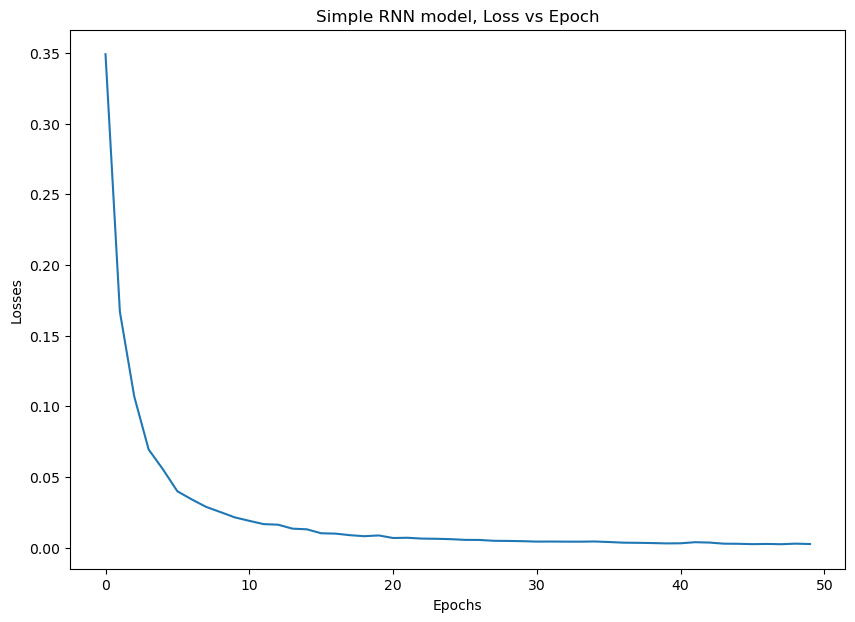

In [19]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

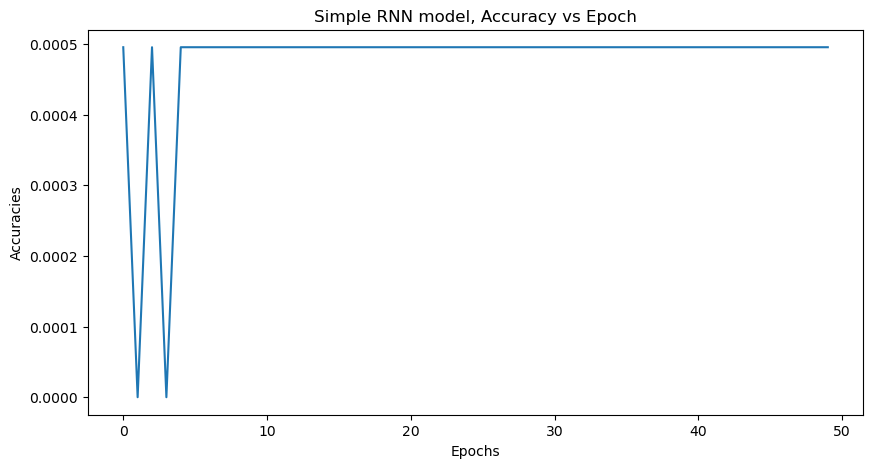

In [20]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [21]:
#Model predictions for train data

y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

64/64 [==============================] - 1s 10ms/step


(2019, 1)

In [22]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(2019, 1)

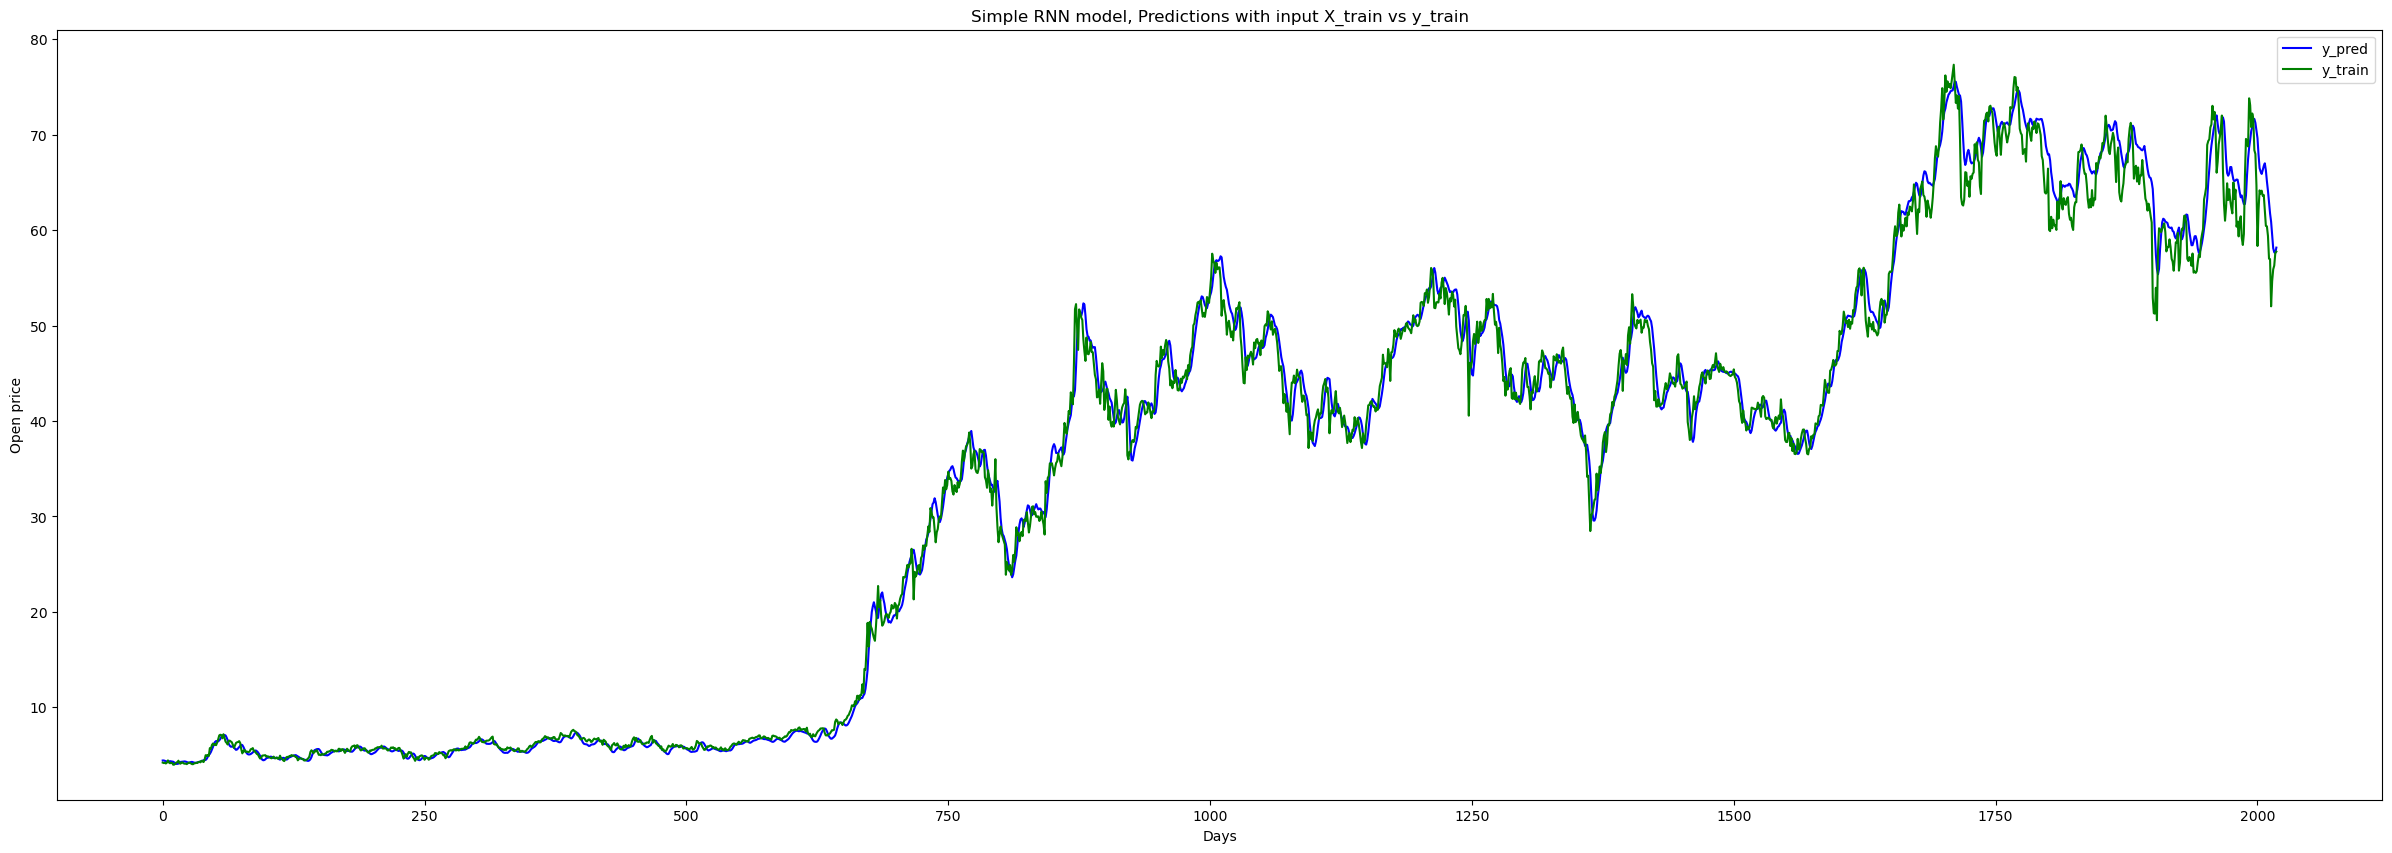

In [23]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [24]:
#8.Creating Test Dataset from Validation Data

# Convert Array and Scaling

dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (887, 1)


In [25]:
#Creating X_test and y_test

# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [26]:
# Convert to array

# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [27]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (837, 50)
Shape of y_test before reshape : (837,)


In [28]:
# Reshape

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [29]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (837, 50, 1)
Shape of y_test after reshape : (837, 1)


In [30]:
#9.Evaluating with Validation Data

# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

27/27 [==============================] - 0s 13ms/step
Shape of y_pred_of_test : (837, 1)


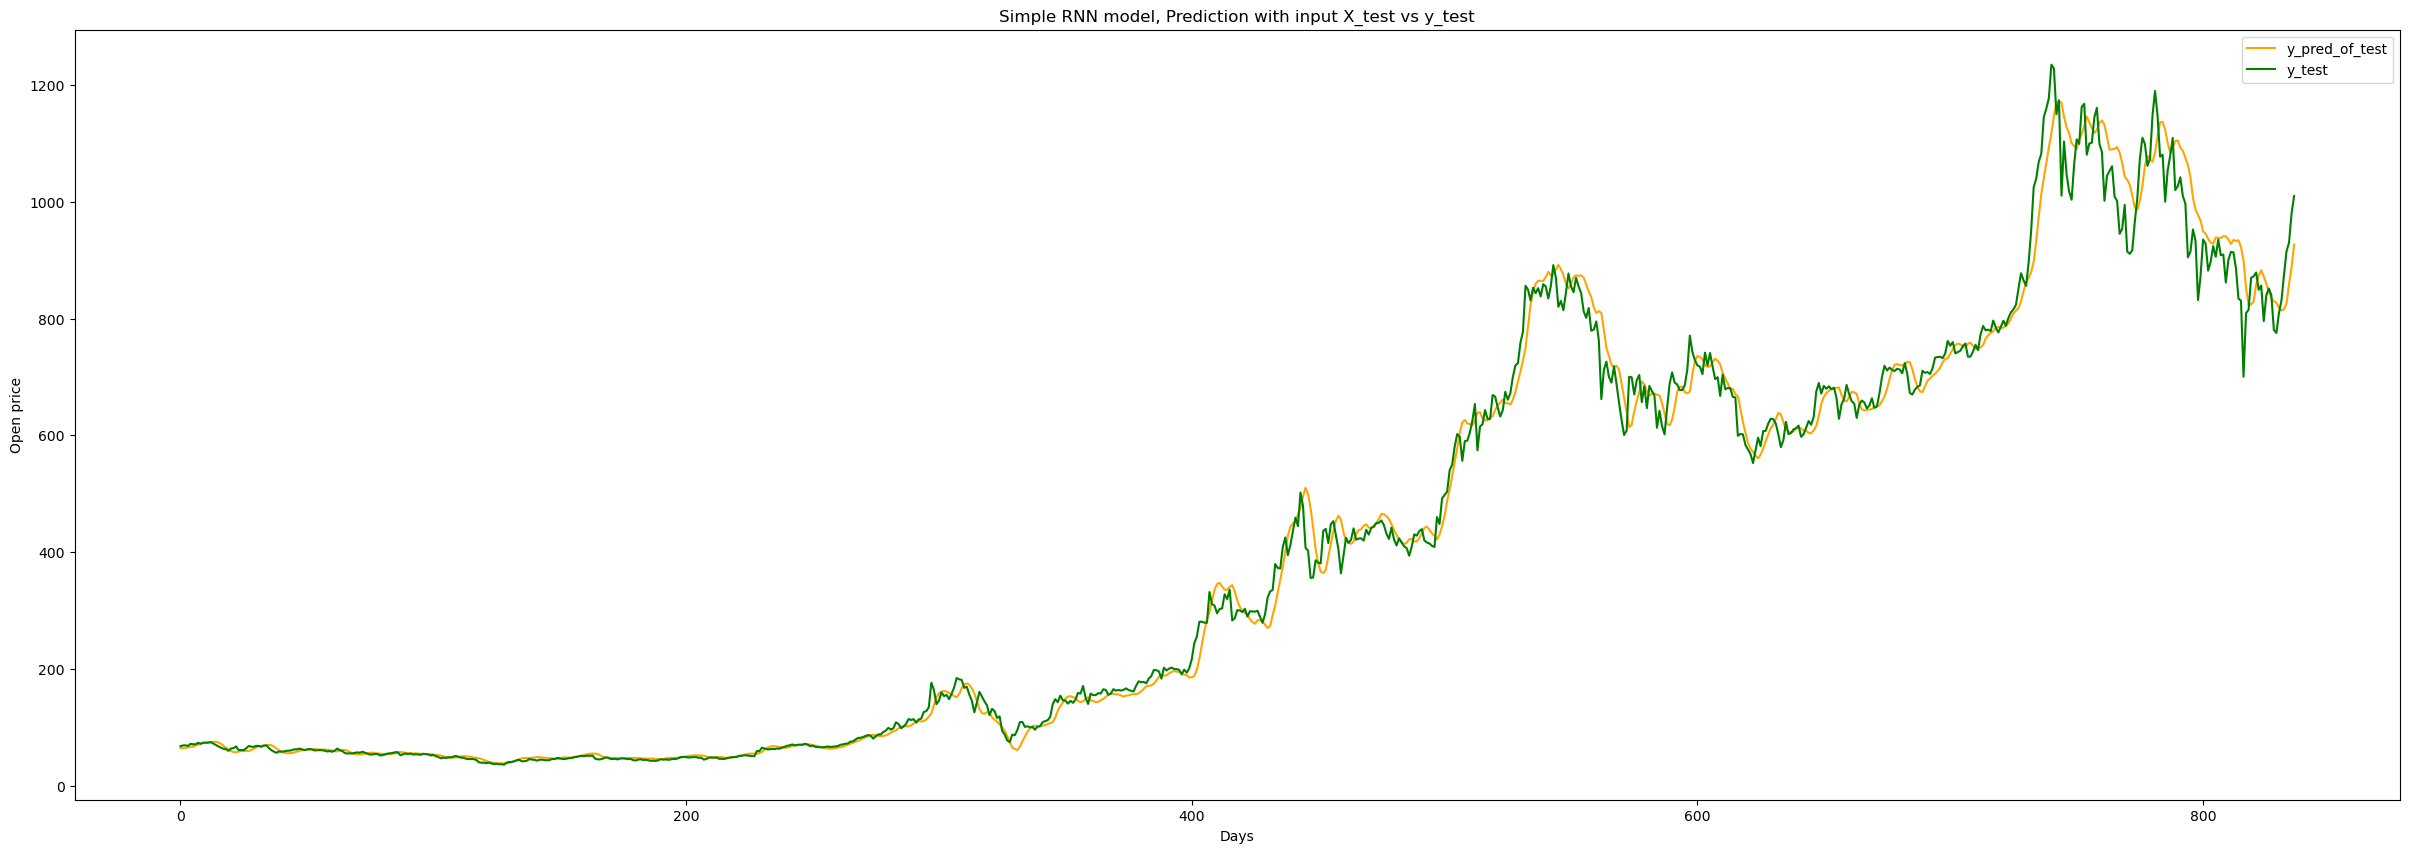

In [31]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

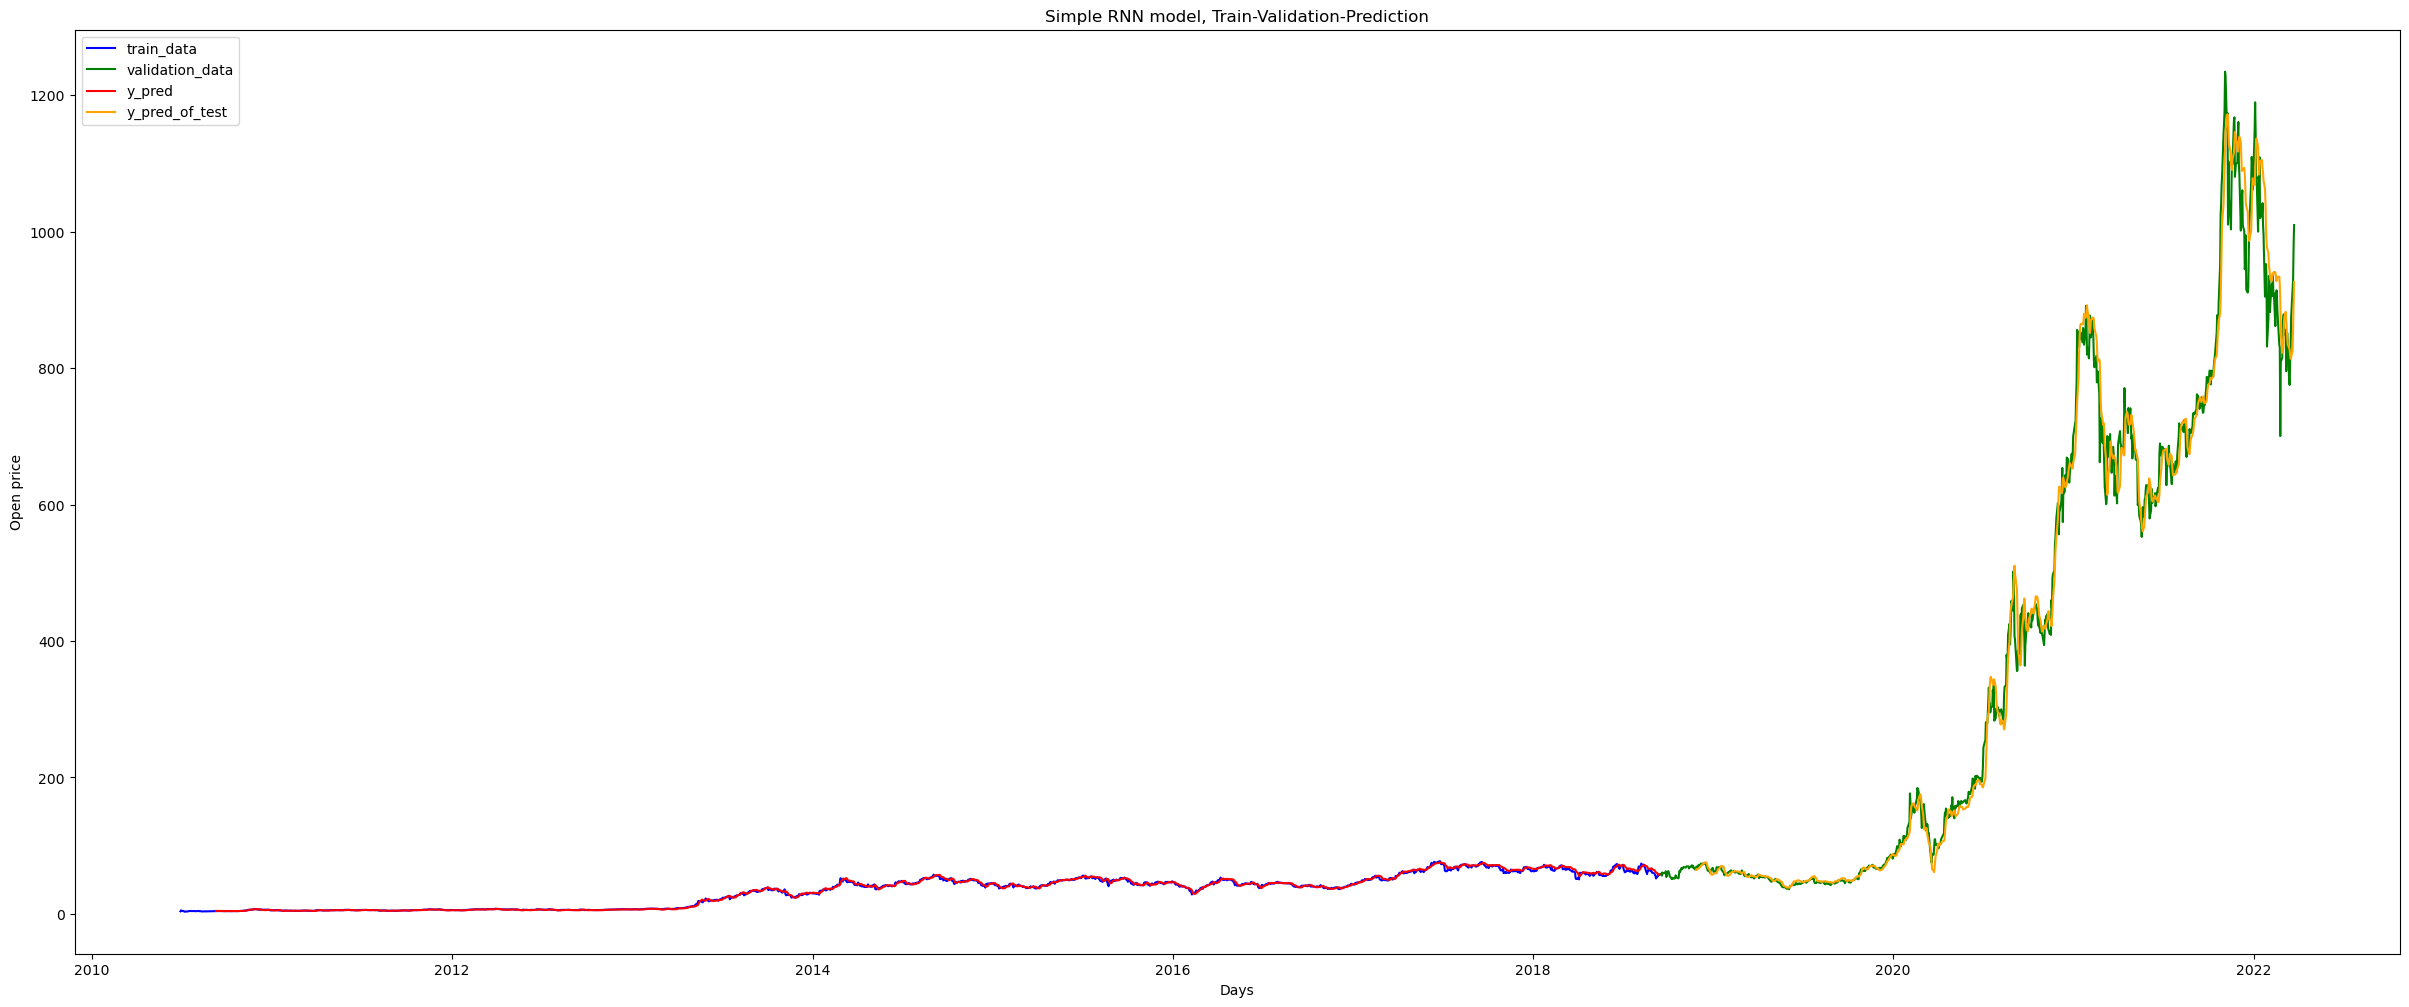

In [32]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [33]:
#10. Creating LSTM Model

y_train = scaler.fit_transform(y_train)

In [34]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
202/202 [==============================] - 8s 21ms/step - loss: 0.0066 - accuracy: 9.9059e-04
Epoch 2/10
202/202 [==============================] - 5s 25ms/step - loss: 0.0013 - accuracy: 9.9059e-04
Epoch 3/10
202/202 [==============================] - 6s 28ms/step - loss: 0.0013 - accuracy: 9.9059e-04
Epoch 4/10
202/202 [==============================] - 4s 22ms/step - loss: 9.2259e-04 - accuracy: 9.9059e-04
Epoch 5/10
202/202 [==============================] - 5s 25ms/step - loss: 8.2396e-04 - accuracy: 9.9059e-04
Epoch 6/10
202/202 [==============================] - 5s 26ms/step - loss: 7.2697e-04 - accuracy: 9.9059e-04
Epoch 7/10
202/202 [==============================] - 5s 24ms/step - loss: 6.0340e-04 - accuracy: 9.9059e-04
Epoch 8/10
202/202 [==============================] - 4s 21ms/step - loss: 5.8264e-04 - accuracy: 9.9059e-04
Epoch 9/10
202/202 [==============================] - 6s 29ms/step - loss: 4.8335e-04 - accuracy: 9.9059e-04
Epoch 10/10
202/202 [==========

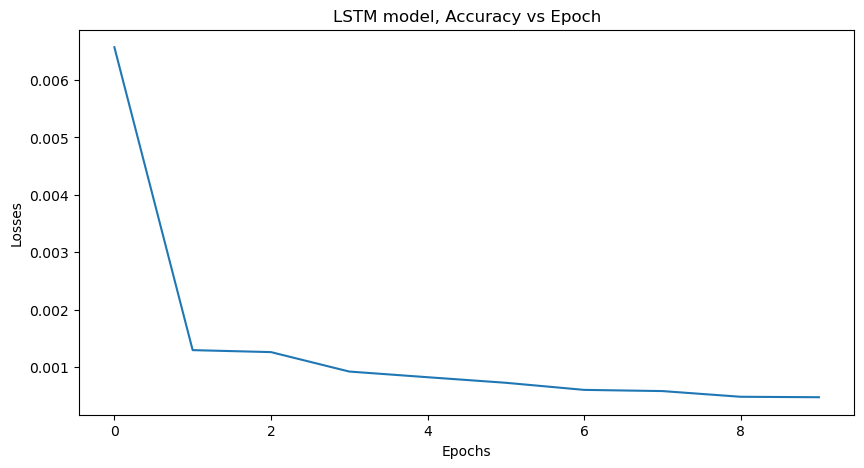

In [35]:
#11.Evaluating LSTM Model

plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

27/27 [==============================] - 1s 11ms/step


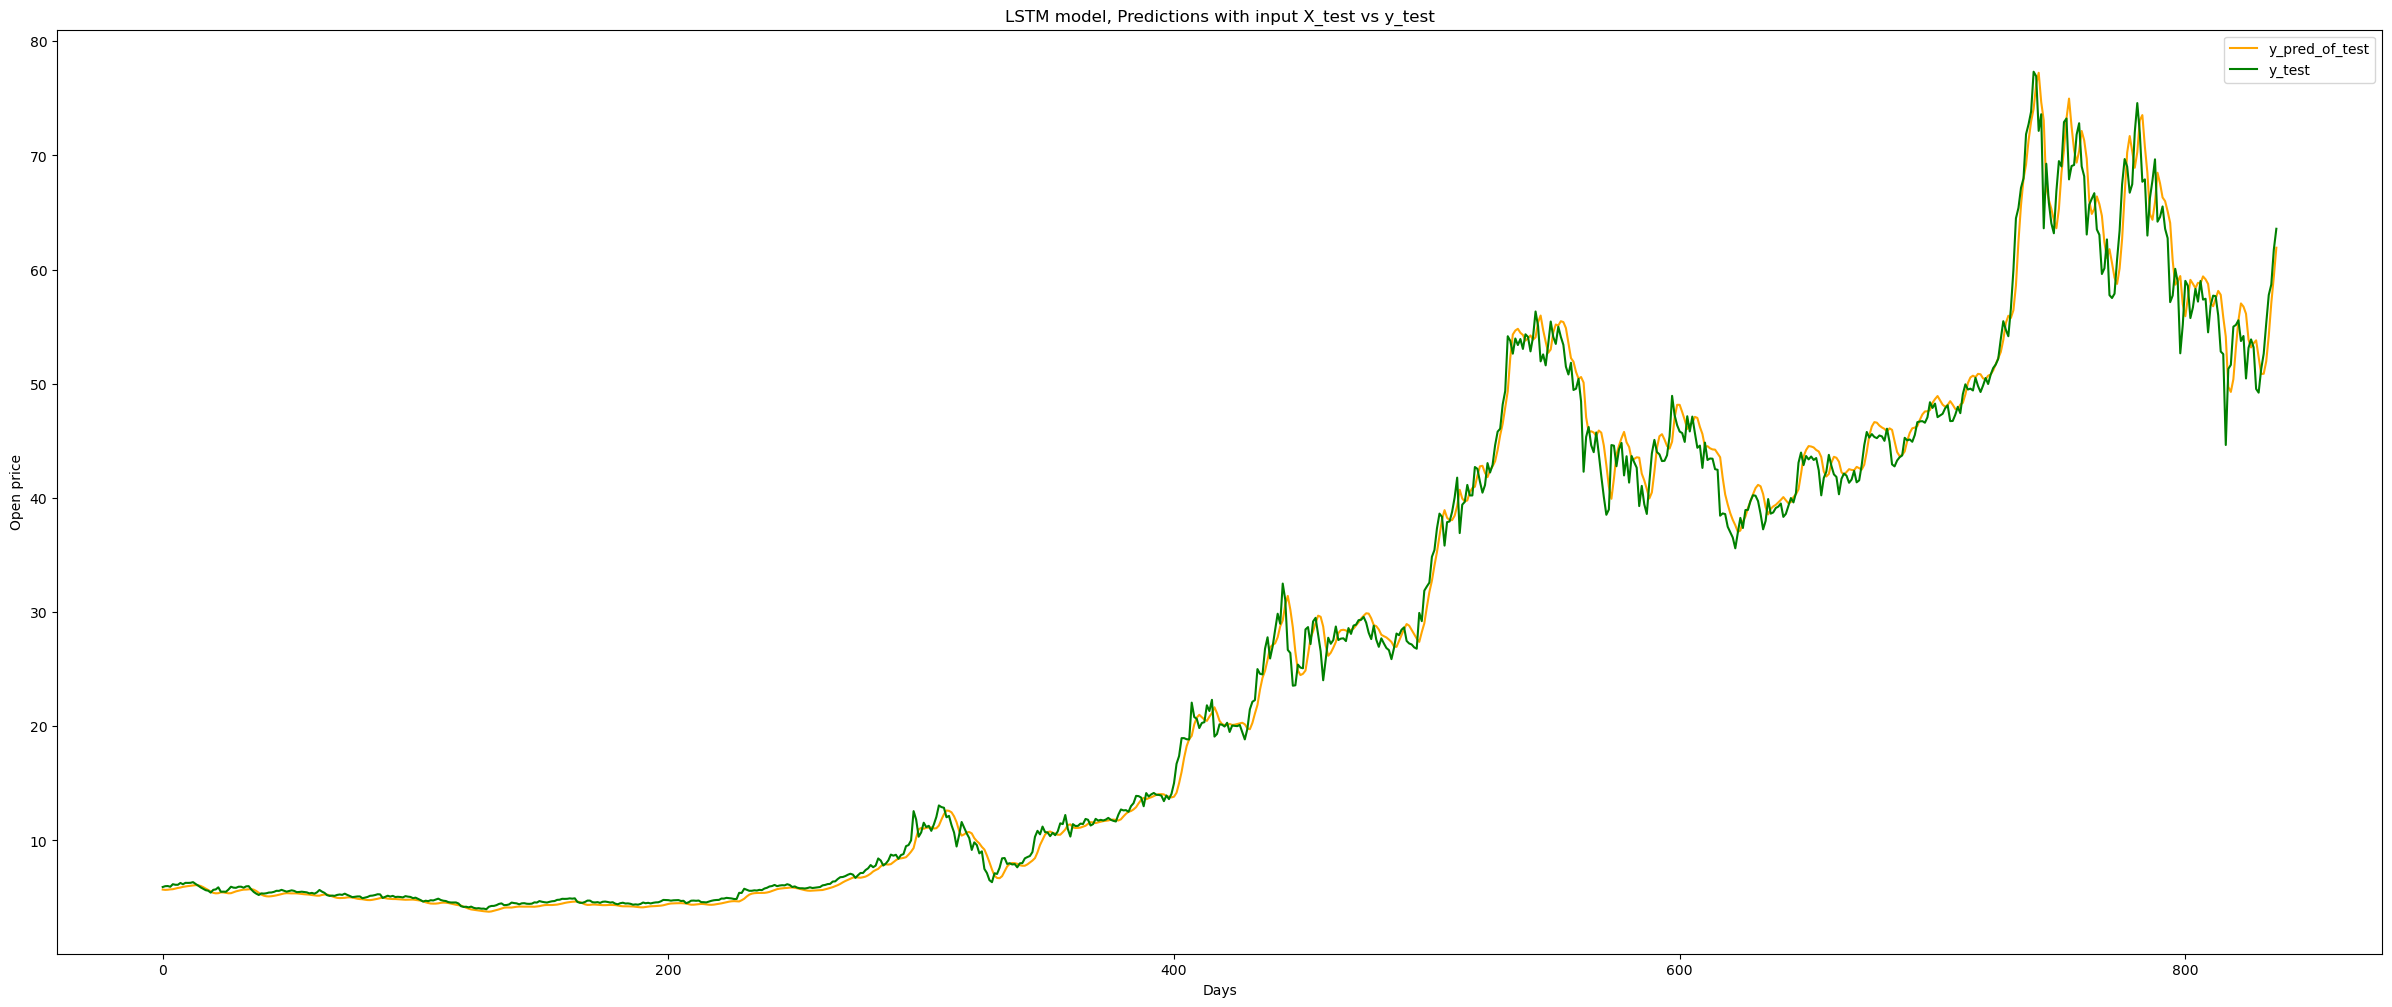

In [36]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [37]:
#12.Future price prediction

data.iloc[-1] #Which day is the last day in our data?

Date          2022-03-24
Open          1009.72998
High          1024.48999
Low           988.799988
Close        1013.919983
Adj Close    1013.919983
Volume          22901900
Name: 2955, dtype: object

In [38]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.92605468],
        [1.        ],
        [0.7817609 ],
        [0.7982285 ],
        [0.83517668],
        [0.75692478],
        [0.72416086],
        [0.50007348],
        [0.52317225],
        [0.61671729],
        [0.57005483],
        [0.32096018],
        [0.42165028],
        [0.57458169],
        [0.5573799 ],
        [0.44438195],
        [0.48162374],
        [0.54663796],
        [0.50195764],
        [0.57406779],
        [0.50890676],
        [0.51198988],
        [0.39439175],
        [0.4884262 ],
        [0.52280515],
        [0.52087215],
        [0.45416956],
        [0.32724873],
        [0.31819516],
        [0.        ],
        [0.2663208 ],
        [0.28046397],
        [0.41423609],
        [0.42023103],
        [0.4364785 ],
        [0.3638788 ],
        [0.38149652],
        [0.23279835],
        [0.3403396 ],
        [0.3696291 ],
        [0.34210145],
        [0.19629046],
        [0.18322408],
        [0.26575806],
        [0.31956542],
        [0

In [39]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 3/18/2017      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 31ms/step
Simple RNN, Open price prediction for 3/18/2017      : 975.8254
LSTM prediction, Open price prediction for 3/18/2017 : 1001.4727
